In [1]:
import graphviz.backend as be

In [3]:
!pip install dtreeviz

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.8/91.8 kB 7.1 MB/s eta 0:00:00


In [22]:
from sklearn.datasets import *
from dtreeviz import *
import pandas as pd
from dtreeviz import dtreeviz
from IPython.display import Image, display_svg, SVG

In [41]:
clas = tree.DecisionTreeClassifier()
iris = load_iris()

X_train = iris.data
y_train = iris.target
clas.fit(X_train, y_train)

DecisionTreeClassifier()

[Text(0.4, 0.8333333333333334, 'x[3] <= 0.8\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]'),
 Text(0.30000000000000004, 0.6666666666666667, 'True  '),
 Text(0.6, 0.5, 'x[3] <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]'),
 Text(0.5, 0.6666666666666667, '  False'),
 Text(0.4, 0.16666666666666666, 'gini = 0.168\nsamples = 54\nvalue = [0, 49, 5]'),
 Text(0.8, 0.16666666666666666, 'gini = 0.043\nsamples = 46\nvalue = [0, 1, 45]')]

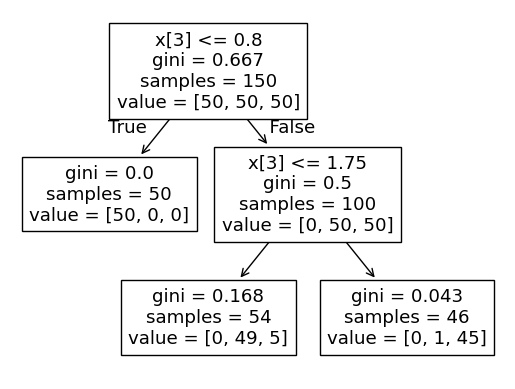

In [7]:
from sklearn.tree import plot_tree
plot_tree(clas)

1. Classification

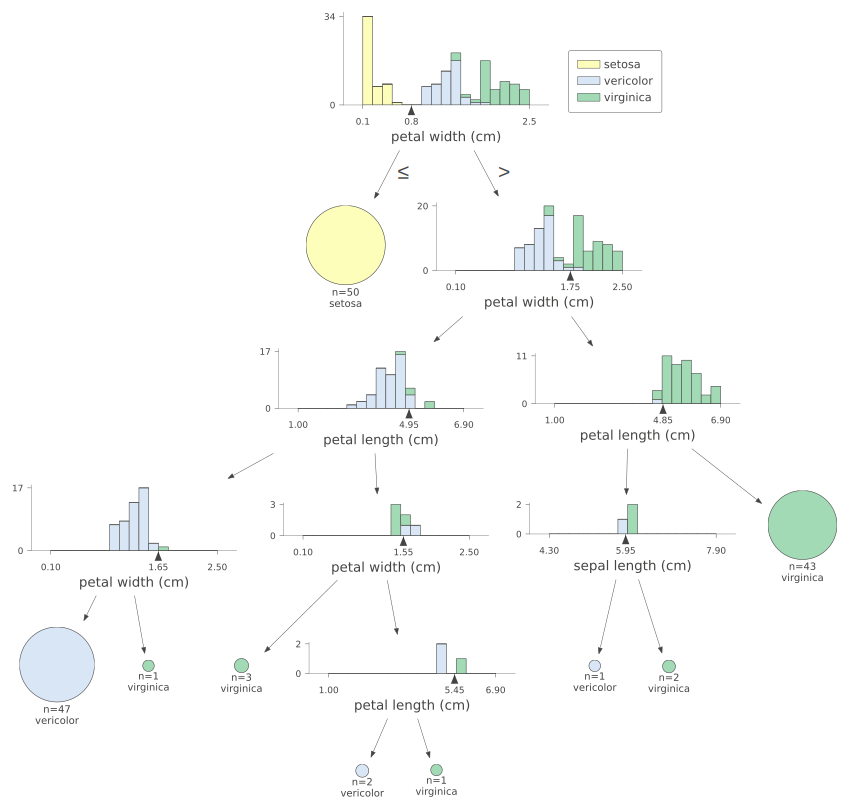

In [42]:
m = dtreeviz.model(
    model=clas,                      # trained decision tree model
    X_train=X_train,                 # training data
    y_train=y_train,                 # target labels
    feature_names=iris.feature_names,
    class_names=['setosa','vericolor','virginica']
)

viz = m.view(scale=1.5)
viz

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names


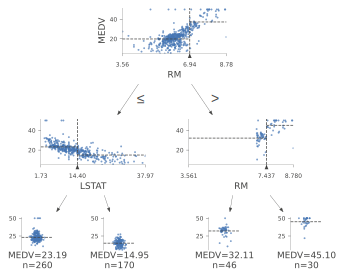

In [34]:
import pandas as pd
import dtreeviz
from sklearn.tree import DecisionTreeRegressor

# Load data
df = pd.read_csv("/content/HousingData.csv")

# Fill NaNs (dtreeviz DOES NOT SUPPORT NaN)
df = df.fillna(df.median(numeric_only=True))

# Train data
X_train = df.drop("MEDV", axis=1)
y_train = df["MEDV"]

# Model
regr = DecisionTreeRegressor(max_depth=2)
regr.fit(X_train, y_train)

# dtreeviz
m = dtreeviz.model(
    model=regr,
    X_train=X_train,
    y_train=y_train,
    feature_names=X_train.columns,
    target_name="MEDV"
)

viz = m.view()
viz


3. Horizontal Decision Tree

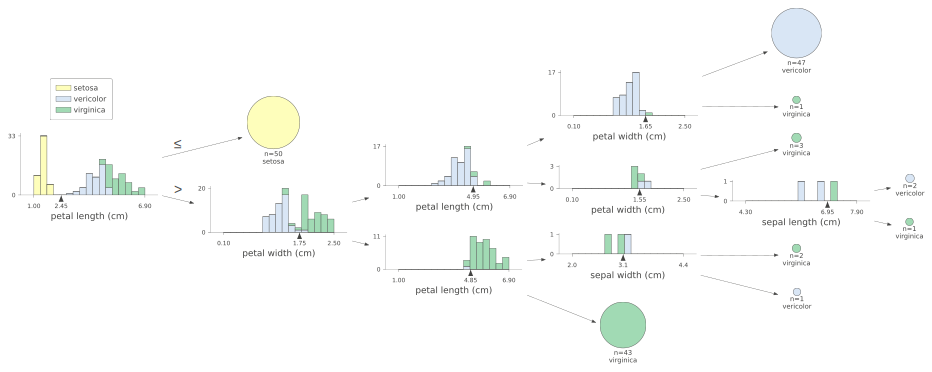

In [38]:
import dtreeviz
m = dtreeviz.model(
    model=clas,
    X_train=iris.data,  # Use iris.data for the Iris classifier
    y_train=iris.target, # Use iris.target for the Iris classifier
    feature_names=iris.feature_names,
    class_names=['setosa','vericolor','virginica']
)

viz = m.view(orientation='LR')
viz

4. Track of Prediction

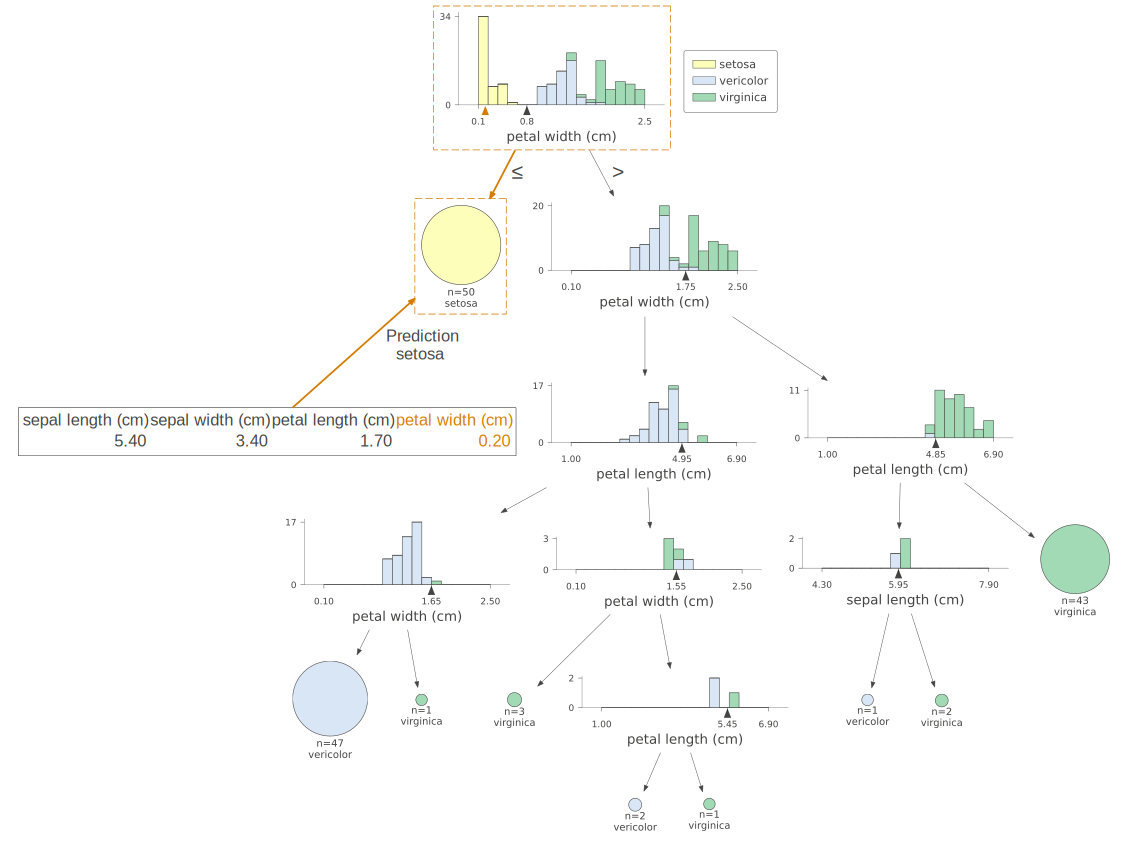

In [46]:
import numpy as np
X_highlight = iris.data[np.random.randint(0,len(iris.data)),:]
m = dtreeviz.model(
    model=clas,                      # trained decision tree model
    X_train=X_train,                 # training data
    y_train=y_train,                 # target labels
    feature_names=iris.feature_names,
    class_names=['setosa','vericolor','virginica']
)

viz = m.view(x=X_highlight, scale=1.5)
viz

5. Show node

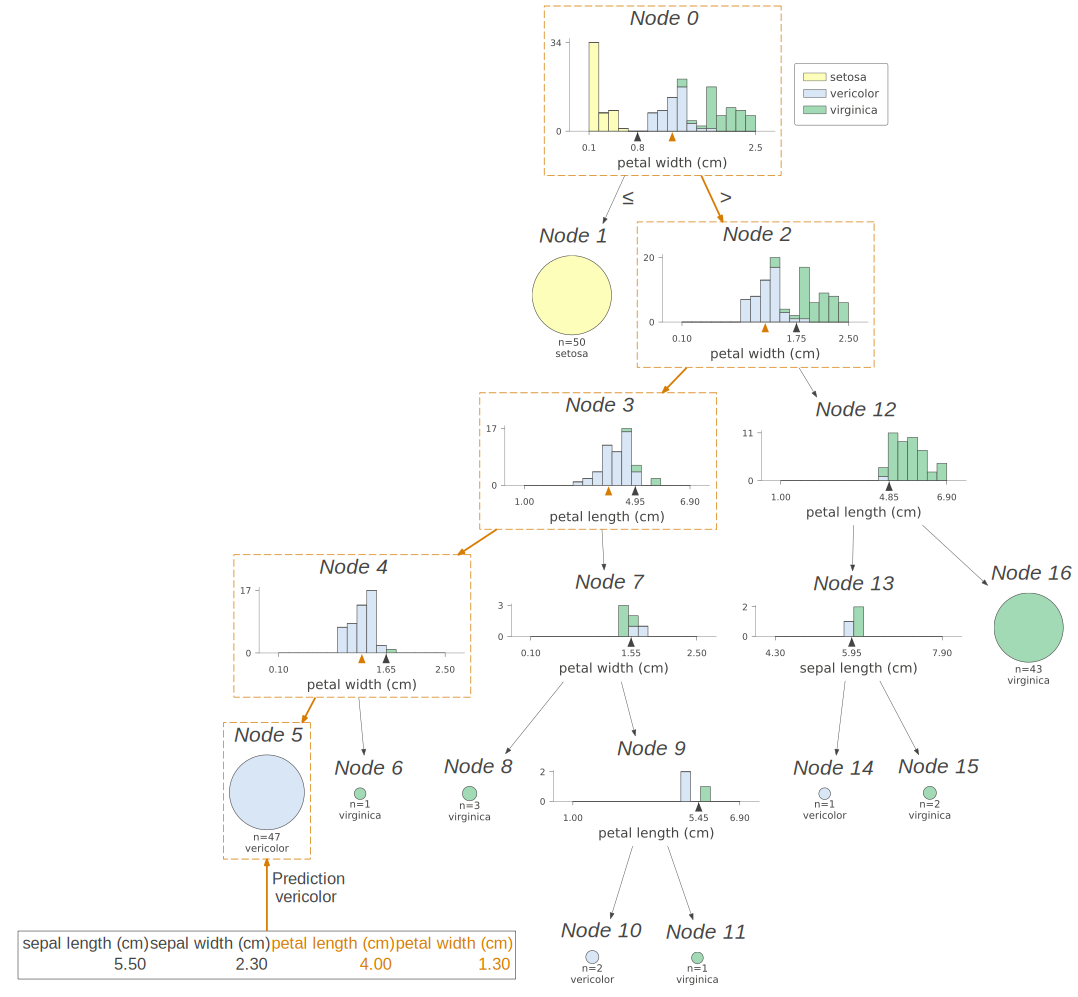

In [47]:
import numpy as np
X_highlight = iris.data[np.random.randint(0,len(iris.data)),:]
m = dtreeviz.model(
    model=clas,                      # trained decision tree model
    X_train=X_train,                 # training data
    y_train=y_train,                 # target labels
    feature_names=iris.feature_names,
    class_names=['setosa','vericolor','virginica']
)

viz = m.view(x=X_highlight, scale=1.5,show_node_labels=True)
viz

6. Without Any graphs

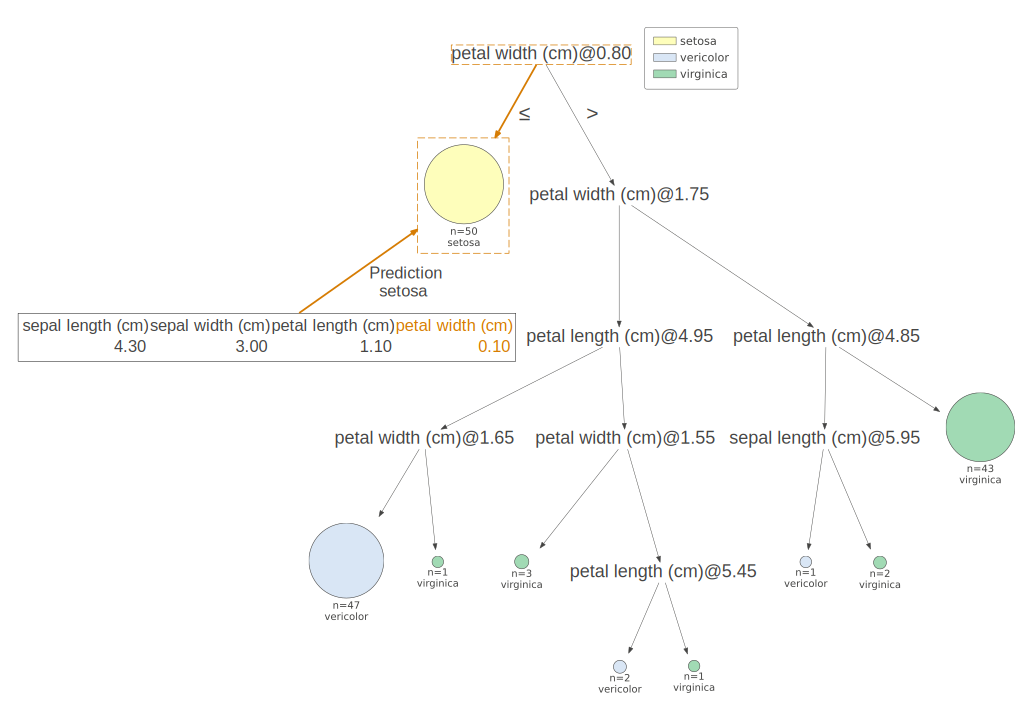

In [48]:
import numpy as np
X_highlight = iris.data[np.random.randint(0,len(iris.data)),:]
m = dtreeviz.model(
    model=clas,                      # trained decision tree model
    X_train=X_train,                 # training data
    y_train=y_train,                 # target labels
    feature_names=iris.feature_names,
    class_names=['setosa','vericolor','virginica']
)

viz = m.view(x=X_highlight, scale=1.5,fancy=False)
viz

7. Show the predication path Only

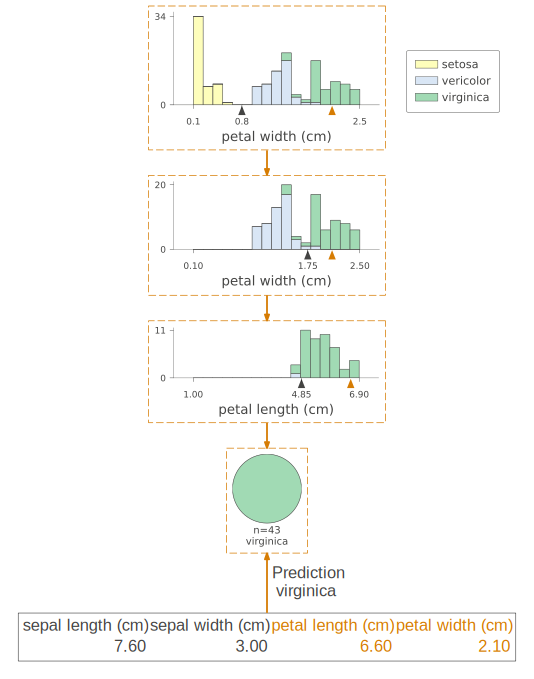

In [49]:
import numpy as np
X_highlight = iris.data[np.random.randint(0,len(iris.data)),:]
m = dtreeviz.model(
    model=clas,                      # trained decision tree model
    X_train=X_train,                 # training data
    y_train=y_train,                 # target labels
    feature_names=iris.feature_names,
    class_names=['setosa','vericolor','virginica']
)

viz = m.view(x=X_highlight, scale=1.5,show_just_path=True)
viz

8. Prediction Path in Plain english

In [50]:
print(explain_prediction_path(clas,X,feature_names=iris.feature_names, explanation_type='plain_english'))

4.85 <= petal length (cm) 
1.75 <= petal width (cm) 



/tmp/ipython-input-2789283488.py:1: DeprecationWarning: explain_prediction_path() function is deprecated starting from version 2.0. 
 For the same functionality, please use this code instead: 
 m = dtreeviz.model(...) 
 m.explain_prediction_path()


9. Feature Importance

/tmp/ipython-input-1789703660.py:1: DeprecationWarning: explain_prediction_path(explanation_type='sklearn_default') function is deprecated starting from version 2.0. 
 For the same functionality, please use this code instead: 
 m = dtreeviz.model(...) 
 m.instance_feature_importance()


None


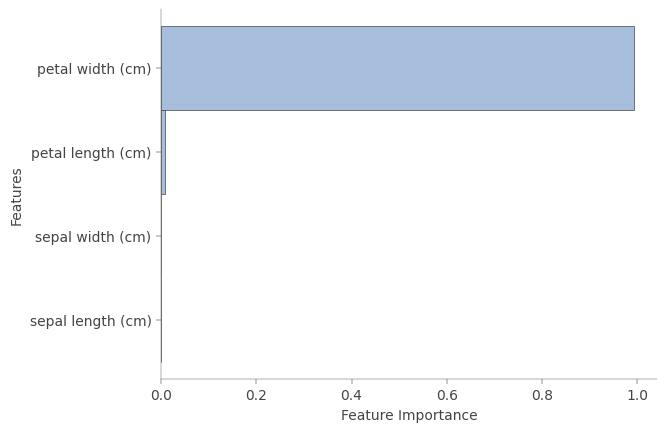

In [51]:
print(explain_prediction_path(clas,X,feature_names=iris.feature_names, explanation_type='sklearn_default'))

10. Univariate Regression

In [ ]:

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from dtreeviz.trees import *

df_cars = pd.read_csv("cars.csv")
X, y = df_cars[['WGT']], df_cars['MPG']

dt = DecisionTreeRegressor(max_depth=3, criterion="mae")
dt.fit(X, y)

fig = plt.figure()
ax = fig.gca()
rtreeviz_univar(dt, X, y, 'WGT', 'MPG', ax=ax)
plt.show()

11. 3-D Regression

In [ ]:

df_cars = pd.read_csv("cars.csv")

df_cars

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.tree import DecisionTreeRegressor
from dtreeviz.trees import *


X = df_cars[['WGT','ENG']]
y = df_cars['MPG']

dt = DecisionTreeRegressor(max_depth=3, criterion="mae")
dt.fit(X, y)

figsize = (6,5)
fig = plt.figure(figsize=figsize)
ax = fig.add_subplot(111, projection='3d')

t = rtreeviz_bivar_3D(dt,
                      X, y,
                      feature_names=['Vehicle Weight', 'Horse Power'],
                      target_name='MPG',
                      fontsize=14,
                      elev=20,
                      azim=25,
                      dist=8.2,
                      show={'splits','title'},
                      ax=ax)
plt.show()
